In [10]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate
import scipy.sparse as sp
from IPython.display import HTML
import matplotlib.animation as animation 

## Overskrift
sjsk

In [11]:
#constants
hbar, m = 1, 1
k0, L = 20, 20
x0 = 5
E = (hbar * k0) ** 2 / 2 / m
omega = E / hbar

def psi_I_anal(x,x0,sigmax, t):
    return np.exp(-(x - x0)**2 / (2 * sigmax**2)) * np.sin(k0 * x - omega * t)
                  
def psi_R_anal(x,x0,sigmax, t):
    return np.exp(-(x - x0)**2 / (2 * sigmax **2)) * np.cos(k0 * x - omega * t)

def make_dt_n(V):
    dt = 0.5 * hbar / ((hbar**2/(2 * m))*((Nx_2-1)/L)**2 + np.amax(V))
    return dt,int(L/ 2 * m / (hbar * k0 * dt))  

def make_psi_init(x0,sigmax,Nx,dt,L):
    x = np.linspace(0, L, Nx)
    C = psi_R_anal(x,x0,sigmax,0) @ psi_R_anal(x,x0,sigmax,0) + psi_I_anal(x,x0,sigmax,0) @ psi_I_anal(x,x0,sigmax,0)
    psi_R_init = psi_R_anal(x,x0,sigmax, 0) / np.sqrt(C)
    psi_I_init = psi_I_anal(x,x0,sigmax, -dt/2) / np.sqrt(C)
    return x , psi_R_init, psi_I_init

In [12]:
def timeEvolve(psi_R,psi_I,n,V,dt):
    Nx = len(V)
    dx = L / (Nx-1)
    
    D1 = V / hbar + hbar / (m * dx**2) * np.ones(Nx) 
    D2 = - hbar / (2 * m * dx**2) *  np.ones(Nx-1) 
    H = sp.diags([D2, D1 ,D2],[-1,0,1])
    for i in range(1,n):
        psi_I = psi_I - dt * H.dot(psi_R)
        psi_R = psi_R + dt * H.dot(psi_I)
    return psi_R,psi_I



def timeEvolveAnimate(psi_R,psi_I,n,V,dt, freq):
    Nx = len(V)
    dx = L / (Nx-1) 
    D1 = V / hbar + hbar / (m * dx**2) * np.ones(Nx) 
    D2 = - hbar / (2 * m * dx**2) *  np.ones(Nx-1) 
    H = sp.diags([D2, D1 ,D2],[-1,0,1])
    psi_I_arr = np.zeros((n-1, Nx))
    psi_R_arr = np.zeros((n-1, Nx))
    print("Freq: ", freq)
    for i in range(1,n):
        psi_I = psi_I - dt * H.dot(psi_R)
        psi_R = psi_R + dt * H.dot(psi_I)
        if (i % freq) == 0:
            psi_I_arr[i] = psi_I
            psi_R_arr[i] = psi_R
            
    return psi_R, psi_I, psi_R_arr, psi_I_arr

def plot_wave(x0,sigmax,dt,L,n,V,title,plot_square = False,plot_potential = False):
    Nx = len(V)
    x , psi_R_init, psi_I_init = make_psi_init(x0,sigmax,Nx,dt,L)
    psi_R, psi_I = timeEvolve(psi_R_init,psi_I_init,n,V,dt)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20,5)
    fig.suptitle(title,y = 0)
    ax1.set_xlabel("x")
    ax2.set_xlabel("x")
    if plot_potential:
        ax1_2 = ax1.twinx() 
        ax1_2.plot(x, V, color = "tab:red",label = "V(x)")
        ax1_2.set(ylim = (-150,150))   
        ax2_2 = ax2.twinx()
        ax2_2.plot(x, V, color = "tab:red",label = "V(x)")
        ax2_2.set(ylim = (-150,150))
        ax1_2.legend(loc="upper right")
        ax2_2.legend(loc ="upper right")
        ax1_2.set_ylabel("V(x)")
        ax2_2.set_ylabel("V(x)")
    if plot_square:
        ax1.plot(x,psi_R_init**2 + psi_I_init**2,color = "tab:blue",label = "probabilty density")
        ax2.plot(x,psi_R**2 + psi_I**2,color = "tab:blue",label = "probabilty density")
        ax1.set_ylabel("$|\psi(x,t)|^2$")
        ax2.set_ylabel("$|\psi(x,t)|^2$")
    else:
        ax1.plot(x,psi_R_init, label = "$\psi_R(x,t)$")
        ax1.plot(x,psi_I_init,label = "$\psi_I(x,t)$")
        ax2.plot(x,psi_R,label = "$\psi_R(x,t)$")
        ax2.plot(x,psi_I,label = "$\psi_I(x,t)$")
        ax1.set_ylabel("$\psi(x,t)$")
        ax2.set_ylabel("$\psi(x,t)$")
    ax1.legend(loc = "upper left")
    ax2.legend(loc = "upper left")
    plt.show()

## Excercise 2
By testing various time steps it was found that $\varDelta T = 0.5 \cdot \varDelta T_0 $ with $\varDelta T_0 := \frac{\hbar}{\frac{\hbar^2}{2m} \frac{1}{\varDelta X^2} + V_{max}}$ gave satisfactory numerical stability.

The group velocity can be calculated using the relation $v_g = \frac{\partial \omega}{\partial k} \rvert_{k_0}$ giving the result $v_g = \frac{\hbar k_0}{m}$. By propagating the wave for a time $\frac{l}{v_g}$ the wave packet will move a distance l. Figure 1 and figure 2 show the wave packet after propagating a distance $l = 10$ from the start position $x_0 = 5$ for the values $\sigma = 0.5$ and $\sigma = 1.5$. The wave packet with initial $\sigma = 1.5$ has a larger spread than the wave with inital $\sigma = 0.5$. The spread is not as large as for the initial condition, ilustrating the fact that waves with a narrower probability density spread faster. 

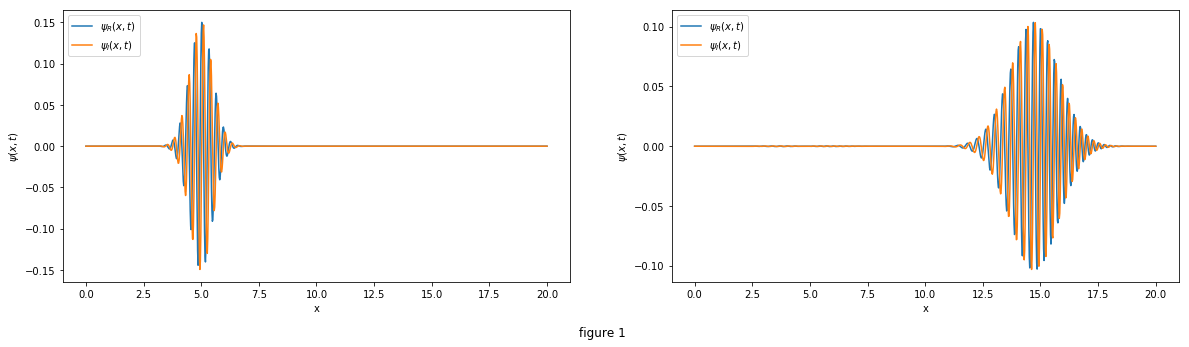

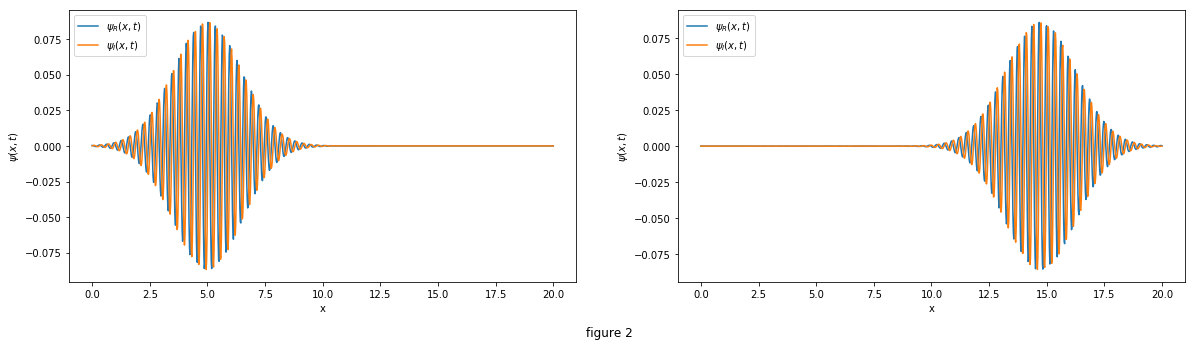

In [13]:
Nx_2 =1000
V_2 = np.zeros(Nx_2)
dt_2, n_2 = make_dt_n(V_2)

sigmax_2 = 0.5
plot_wave(x0,sigmax_2,dt_2,L,n_2,V_2,"figure 1",False,False)

sigmax_2 = 1.5
plot_wave(x0,sigmax_2,dt_2,L,n_2,V_2,"figure 2",False,False)

In [14]:
def calculate_prob(psi_R, psi_I, L,  Nx):
    P_left = psi_R[:int(Nx / 2)] @ psi_R[:int(Nx / 2)] + psi_I[:int(Nx / 2)] @ psi_I[:int(Nx / 2)] 
    P_right= psi_R[int(Nx / 2):] @ psi_R[int(Nx / 2):] + psi_I[int(Nx / 2):] @ psi_I[int(Nx / 2):]
    return P_left, P_right

def make_potential(Nx, L, l, b):
    V = np.zeros(Nx)
    V_temp = np.ones(int(l / L * Nx)) * b
    V[int(Nx / 2 - l * Nx / L /  2): int(Nx/2 + l * Nx / L /  2) ] = V_temp
    return V

## Exercise 3
Figure XX shows the initial wave packet to the left and the propagated wave packet after a time $T = XX$ to the right. After propagation, the wave is partially transmitted and partially reflected. For the spesific wave packet in the figure, the probability is XX for it to be measured to the left and YY to the right of the barrier.   

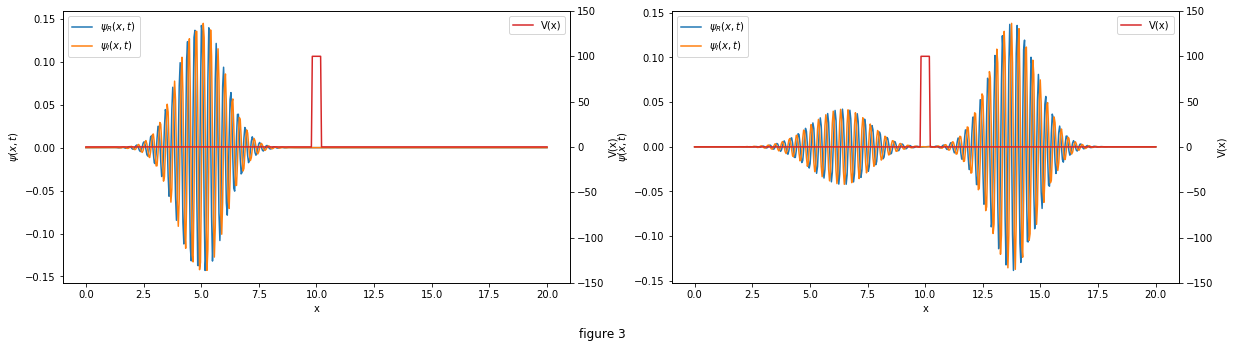

Reflection probability:  0.1001 
Transmission probability 0.8999


In [19]:
##Barrier, exercise 3
l = L / 50 #width of potential
b = E / 2.0 #height of potential
V_3 = make_potential(Nx, L, l, b)
dt_3, n_3 = make_dt_n(V_3)
sigmax_3 = 1

plot_wave(x0,sigmax_3,dt_3,L,n_3,V_3,"figure 3",False,True)



psi_R_3, psi_I_3 = timeEvolve(psi_R_init, psi_I_init, n, V_3, dt)
P_left, P_right = calculate_prob(psi_R_3, psi_I_3, L, Nx)
print("Reflection probability: ", round( P_left, 4), "\nTransmission probability", round(P_right,4))

In [ ]:
##Animating barrier
#n = 1000
#dt = 0.0001
#Nx = 100
#L = 20
#l = L / 50
#b = E / 2.0
#
#x0 = 5
#sigmax = 1
#
##make potential
#V_4 = np.zeros(Nx)
#Vk = np.ones(int(l / L * Nx)) * b
#V_4[int(Nx/2 - l * Nx / L /  2): int(Nx/2 + l * Nx / L /  2) ] = Vk
#
#x, psi_R_init_4, psi_I_init_4 = make_psi_init(x0, sigmax, Nx, dt, L)
#
#
#psi_R_4, psi_I_4, psi_R_arr_4, psi_I_arr_4 = timeEvolveAnimate(psi_R_init_4, psi_I_init_4 ,n ,V_4 , dt, freq = 1000)
#
#def animate( psi, ):
#    fig = plt.figure( figsize = (8, 8))
#ax = plt.axes(xlim = (-50, 50), ylim = (-50 , 50))
#line, = ax.plot([], [], lw = 2) #lw = linewidth
#def init():
#    line.set_data([], [])
#    return line
#
#
#
#
#
#def animateWave(psi, x): #i = frame number
#    print(psi.shape[0])
#    def animate(i):
#        line.set_ydata(psi[i, :])
#    
#    plt.style.use('ggplot')
#
#    fig, ax = plt.subplots(figsize=(10, 6))
#    #ax.set(xlim=(-3, 3), ylim=(-1, 1))
#    
#    line = ax.plot(x, psi[0, :], color='k', lw=2)[0]
#    anim = animation.FuncAnimation(
#fig, animate, interval=100, frames = psi.shape[0])
# 
#    plt.draw()
#    plt.show()
#    HTML(anim.to_html5_video())
#    return line
#
#animateWave(psi_R_arr_4, x)

## Exercise 4
A plot of the reflection probability as a function of $ E / V_0 $ is shown to the left in figure XX. The transmission probability  is shown to the right in the figure. 

In [ ]:
n = 100000
dt = 0.00001
Nx = 100
L = 20
l = L / 50
b = E / 2.0
sigmax = 1

def transmission_graph(VArr, x, sigmax, dt, L ):
    x, psi_R_init, psi_I_init = make_psi_init(x, sigmax, Nx, dt, L)
    P_left = np.zeros(len(VArr))
    P_right = np.zeros(len(VArr))
    for i in range(len(VArr)):
        psi_R, psi_I = timeEvolve(psi_R_init, psi_I_init, n, VArr[i], dt)
        P_left[i], P_right[i] = calculate_prob(psi_R, psi_I, L, Nx)
    return P_left, P_right

def makePotentials(Nx, n):
    VR = np.linspace(0, 3 / 2 * E, 50)
    VArr = np.zeros((len(VR), Nx)) #array of potentials
    for i in range(len(VArr)):
        V_temp = np.zeros(Nx)
        Vk_temp = np.ones(int(l / L * Nx)) * VR[i]
        V_temp[int(Nx/2 - l * Nx / L /  2): int(Nx / 2 + l * Nx / L /  2) ] = Vk_temp
        VArr[i] = V_temp
    return VArr, VR

VArr, VR = makePotentials(Nx, n)
P_left_arr, P_right_arr = transmission_graph(VArr, x, sigmax, Nx, dt, L)
print("yo")
plt.plot(VR, P_left_arr)
print(VR)
print(P_left_arr)
plt.show()
#plt.plot(VR, P_right_arr)
#print(P_right_arr)
plt.show()

In [ ]:
#Make potential.
L = 20
b = 9 / 10 * E
Nx = 1000
dt = 0.0001
l_arr = np.linspace(0, L / 20, 50)


def transmission_graph_width(x, sigmax, Nx, dt, l_arr, L ):
    x, psi_R_init, psi_I_init = make_psi_init(x, sigmax, Nx, dt, L)
    P_left = np.zeros(len(l_arr))
    P_right= np.zeros(len(l_arr))
    
    
    for i in range(len(l_arr)):
        V_5 = np.zeros(Nx)
        V_5_temp = np.ones(int(l / L * Nx)) * l_arr[i]
        V_5[int(Nx/2 - l * Nx / L /  2): int(Nx / 2 + l * Nx / L /  2) ] = V_5_temp
        
        psi_R, psi_I = timeEvolve(psi_R_init, psi_I_init, n, V_5, dt)
        P_left[i], P_right[i] = calculate_prob(psi_R, psi_I, L, Nx)
    return P_left, P_right

P_left, P_right = transmission_graph_width(x, sigmax, Nx, dt, l_arr, L)
plt.plot(l_arr, P_left)

plt.show()